# Plotting output of sensor test

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os
sns.set()

Define input file name (slightly cleaned up manually: missing values removed) and check if it exists. Also, we save figures to a different directory.

In [2]:
infn = "../data/input_for_plot/tempsensors_cleaned.dat"
outdir = '../figures'

In [3]:
os.path.exists(infn)

True

Read data into a pandas dataframe.

In [4]:
data = pd.read_csv(infn, delimiter='\t')
data_allT = data[['time_AKDT', 'DHT11_T', 'SHT31_T', 'P36_T']].melt(
    'time_AKDT', var_name='sensor', value_name='T_Celsius')

In [5]:
data.columns = ['time_AKDT', 'DHT11 Temp C', 'DHT11 %RH', 
                'TMP36 Temp C', 'SHT31 Temp C', 'SHT31 %RH']

In [6]:
data['time'] = pd.to_datetime(data['time_AKDT'], format='%Y%m%d_%H%M%S')
data['elapsed'] = pd.to_datetime(data.time - data.time.iloc[0])

In [7]:
data.head()

,time_AKDT,DHT11 Temp C,DHT11 %RH,TMP36 Temp C,SHT31 Temp C,SHT31 %RH,time,elapsed
0,20181209_040401,22.0,14,25.11,22.68,18.61,2018-12-09 04:04:01,1970-01-01 00:00:00
1,20181209_040412,22.0,14,24.54,22.72,18.36,2018-12-09 04:04:12,1970-01-01 00:00:11
2,20181209_040422,22.0,14,25.51,22.68,18.15,2018-12-09 04:04:22,1970-01-01 00:00:21
3,20181209_040432,22.0,14,24.46,22.62,18.11,2018-12-09 04:04:32,1970-01-01 00:00:31
4,20181209_040443,22.0,13,25.11,22.58,18.24,2018-12-09 04:04:43,1970-01-01 00:00:42


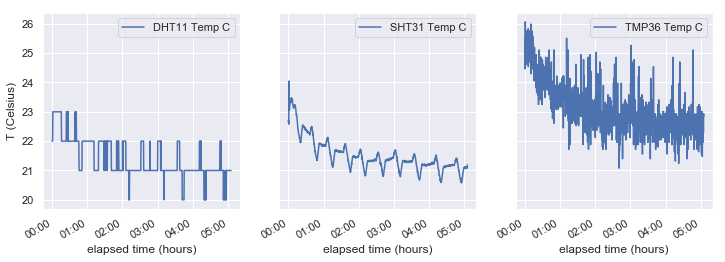

In [8]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

data[['elapsed', 'DHT11 Temp C']].set_index('elapsed').plot(ax=ax1)
data[['elapsed', 'SHT31 Temp C']].set_index('elapsed').plot(ax=ax2)
data[['elapsed', 'TMP36 Temp C']].set_index('elapsed').plot(ax=ax3)
ax1.set_ylabel('T (Celsius)')
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.set_xlabel('elapsed time (hours)')


In [9]:
fp = os.path.join(outdir, "fig1.png")
fig.savefig(fp, bbox_inches='tight', dpi=96)

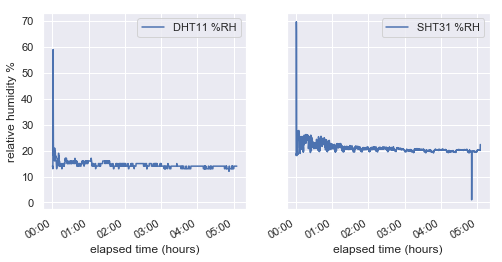

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

data[['elapsed', 'DHT11 %RH']].set_index('elapsed').plot(ax=ax1)
data[['elapsed', 'SHT31 %RH']].set_index('elapsed').plot(ax=ax2)
ax1.set_ylabel('relative humidity %')
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.set_xlabel('elapsed time (hours)')


In [11]:
fp = os.path.join(outdir, "fig2.png")
fig.savefig(fp, bbox_inches='tight', dpi=96)

(19, 27)

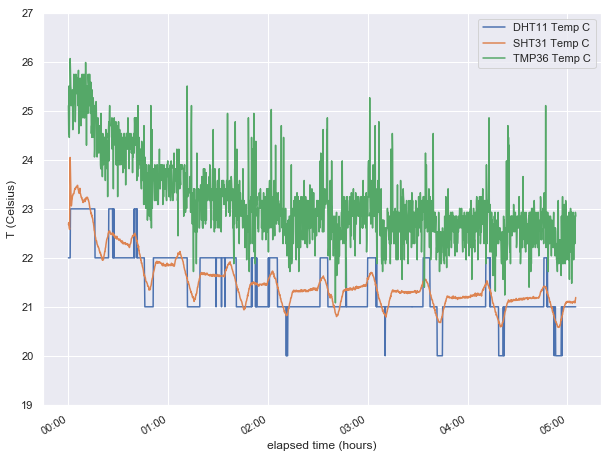

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[['elapsed', 'DHT11 Temp C', 'SHT31 Temp C', 'TMP36 Temp C']].set_index('elapsed').plot(
    ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_xlabel('elapsed time (hours)')
ax.set_ylabel('T (Celsius)')
ax.set_ylim((19, 27))

In [13]:
fp = os.path.join(outdir, "fig3.png")
fig.savefig(fp, bbox_inches='tight', dpi=96)

(0, 27)

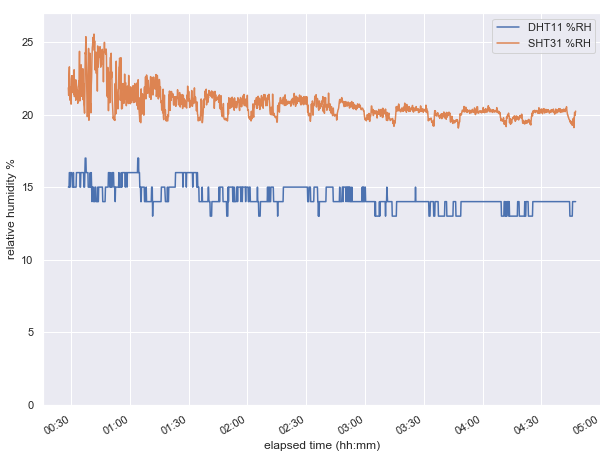

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[162:-100][['elapsed', 'DHT11 %RH', 'SHT31 %RH']].set_index('elapsed').plot(ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_xlabel('elapsed time (hh:mm)')
ax.set_ylabel('relative humidity %')
ax.set_ylim((0, 27))

In [15]:
fp = os.path.join(outdir, "fig4.png")
fig.savefig(fp, bbox_inches='tight', dpi=96)

Text(0,0.5,'relative humidity %')

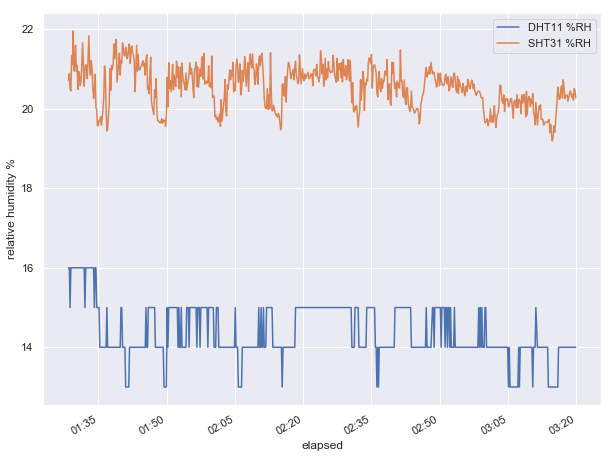

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[500:-600][['elapsed', 'DHT11 %RH', 'SHT31 %RH']].set_index('elapsed').plot(ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_ylabel('relative humidity %')

In [17]:
fp = os.path.join(outdir, "fig5.png")
fig.savefig(fp, bbox_inches='tight', dpi=96)

In [18]:
data[140:-100]

,time_AKDT,DHT11 Temp C,DHT11 %RH,TMP36 Temp C,SHT31 Temp C,SHT31 %RH,time,elapsed
140,20181209_042848,23.0,16,25.11,22.55,25.99,2018-12-09 04:28:48,1970-01-01 00:24:47
141,20181209_042858,23.0,16,24.86,22.51,22.17,2018-12-09 04:28:58,1970-01-01 00:24:57
142,20181209_042909,23.0,15,24.70,22.51,23.35,2018-12-09 04:29:09,1970-01-01 00:25:08
143,20181209_042919,23.0,15,24.70,22.50,20.49,2018-12-09 04:29:19,1970-01-01 00:25:18
144,20181209_042929,23.0,15,24.70,22.48,21.13,2018-12-09 04:29:29,1970-01-01 00:25:28
145,20181209_042940,23.0,15,24.70,22.48,19.94,2018-12-09 04:29:40,1970-01-01 00:25:39
146,20181209_042950,23.0,15,24.70,22.48,23.68,2018-12-09 04:29:50,1970-01-01 00:25:49
147,20181209_043000,23.0,16,24.46,22.50,24.40,2018-12-09 04:30:00,1970-01-01 00:25:59
148,20181209_043011,23.0,15,24.86,22.50,25.14,2018-12-09 04:30:11,1970-01-01 00:26:10
149,20181209_043021,23.0,15,24.22,22.50,23.56,2018-12-09 04:30:21,1970-01-01 00:26:20


In [19]:
pd.to_datetime(data.time - data.time.iloc[0]).dt.strftime('%H:%M')

0       00:00
1       00:00
2       00:00
3       00:00
4       00:00
5       00:00
6       00:01
7       00:01
8       00:01
9       00:01
10      00:01
11      00:01
12      00:02
13      00:02
14      00:02
15      00:02
16      00:02
17      00:02
18      00:03
19      00:03
20      00:03
21      00:03
22      00:03
23      00:03
24      00:04
25      00:04
26      00:04
27      00:04
28      00:04
29      00:05
        ...  
1706    05:00
1707    05:00
1708    05:00
1709    05:00
1710    05:00
1711    05:00
1712    05:01
1713    05:01
1714    05:01
1715    05:01
1716    05:01
1717    05:01
1718    05:02
1719    05:02
1720    05:02
1721    05:02
1722    05:02
1723    05:02
1724    05:03
1725    05:03
1726    05:03
1727    05:03
1728    05:03
1729    05:04
1730    05:04
1731    05:04
1732    05:04
1733    05:04
1734    05:04
1735    05:05
Name: time, Length: 1736, dtype: object